In [1]:
from mxnet import np, npx# np (numpy) and npx (numpy_extension) modules from MXNet
npx.set_np()
import mxnet

In [2]:
print(mxnet.__version__)

1.6.0


When using ndarray, we
almost always invoke the set_np function: this is for compatibility of ndarray processing by other
components of MXNet.

An ndarray represents a (possibly multi-dimensional) array of numerical values. With $ONE$ axis,
an ndarray corresponds (in math) to a $VECTORS$. With $two$ axes, an ndarray corresponds to a $MATRIX$.
Arrays with more than two axes do not have special mathematical names, we simply call them $TENSORS$

---

[4.] [16.]


----
creating a row vector x containing the first 10 integers starting with 0,
though they are created as floats by default. Each value in an ndarray is called an element of the ndarray.

In [2]:
x=np.arange(10)
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [3]:
# We can access an ndarrayʼs shape (the length along each axis) by inspecting its shape property
x.shape

(10,)

In [4]:
# to know the total number of elements in an ndarray, i.e., the product of all of the 
# shape elements, we can inspect its size property
x.size

10

To change the shape of an ndarray without altering either the number of elements or their values,
we can invoke the reshape function.

In [3]:
x=x.reshape(-1,5)
x

array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]])

The empty method grabs a chunk of memory and hands us back a matrix without bothering to
change the value of any of its entries. This is remarkably efficient but we must be careful because
the entries might take arbitrary values, including very big ones!

In [4]:
np.empty([3,4])

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 3.833953e-42, 0.000000e+00],
       [0.000000e+00, 8.908203e-39, 0.000000e+00, 1.695571e-43]])

ndarray representing a tensor with all elements set to 0 and a shape of (2, 3, 4) as follows:

In [5]:
np.zeros([2,3,4])

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [6]:
np.zeros((2, 1, 4))

array([[[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]]])

In [7]:
np.random.normal(0,1,size=(3,4))

array([[ 1.1630785 ,  0.4838046 ,  0.29956347,  0.15302546],
       [-1.1688148 ,  1.558071  , -0.5459446 , -2.3556297 ],
       [ 0.54144025,  2.6785064 ,  1.2546344 , -0.54877406]])

concatenate two matrices along rows
(axis 0, the first element of the shape) vs. columns (axis 1, the second element of the shape)

In [8]:
x = np.arange(12).reshape(3, 4)
y = np.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(y)
print('------')
print(x)
print('---')
print('concatenating along the rows')
xx=np.concatenate([y,x],axis=0)
print(xx)
print('---')

print('concatenating along the columns')
yy=np.concatenate([y,x],axis=1)
yy

[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]]
------
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
---
concatenating along the rows
[[ 2.  1.  4.  3.]
 [ 1.  2.  3.  4.]
 [ 4.  3.  2.  1.]
 [ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
---
concatenating along the columns


array([[ 2.,  1.,  4.,  3.,  0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.,  4.,  5.,  6.,  7.],
       [ 4.,  3.,  2.,  1.,  8.,  9., 10., 11.]])

# Broadcasting Mechanism

In [9]:
from pprint import pprint

In [11]:
a = np.arange(3).reshape(3, 1)
b = np.arange(4).reshape(1, 4)
pprint(a)
pprint(b)

array([[0.],
       [1.],
       [2.]])
array([[0., 1., 2., 3.]])


In [16]:
c=a+b
c

array([[0., 1., 2., 3.],
       [1., 2., 3., 4.],
       [2., 3., 4., 5.]])

In [17]:
a[-1]

array([2.])

In [18]:
c.shape

(3, 4)

In [19]:
c[0:2,1:3]

array([[1., 2.],
       [2., 3.]])

In [20]:
# all values of row 1 to row 2
c[1:3]

array([[1., 2., 3., 4.],
       [2., 3., 4., 5.]])

In [21]:
c[1,2]

array(3.)

In [22]:
d=np.array([[1,2,3],[4,5,6],[7,8,9]])
d

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [23]:
type(d)

mxnet.numpy.ndarray

In [24]:
d[None]

array([[[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]])

In [26]:
c=np.array([2,3,4])
print('c values')
print(c)
print('brocasting c and d')
print(d+c)

c values
[2. 3. 4.]
brocasting c and d
[[ 3.  5.  7.]
 [ 6.  8. 10.]
 [ 9. 11. 13.]]


In [27]:
c+d

array([[ 3.,  5.,  7.],
       [ 6.,  8., 10.],
       [ 9., 11., 13.]])

In [30]:
# c is a column vector with 3 elements
c.shape,c

((3,), array([2., 3., 4.]))

In [30]:
# brocasting c to the shape of d 
np.broadcast_to(c[:,None],d.shape)

array([[2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

In [31]:
# brocasting c to the shape of d 
np.broadcast_to(c,d.shape)

array([[2., 3., 4.],
       [2., 3., 4.],
       [2., 3., 4.]])

In [32]:
c.shape

(3,)

In [33]:
# brocasting c to the shape of  3 by 4
np.broadcast_to(np.expand_dims(c,1),(3,4))

array([[2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.]])

In [34]:
d

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [35]:
#second row
print('all elements of the second row',d[1])
#second column
print('all elements of the second column',d[:,1])
print("element at position M_i,j where  i=2 and j=2 is \n",d[2,2])


all elements of the second row [4. 5. 6.]
all elements of the second column [2. 5. 8.]
element at position M_i,j where  i=2 and j=2 is 
 9.0


In [36]:
d[0:2,:]=10
d

array([[10., 10., 10.],
       [10., 10., 10.],
       [ 7.,  8.,  9.]])

In the previous example, every time we ran an operation, we allocated new memory to host its
results. For example, if we write y = x + y, we will dereference the ndarray that y used to point to
and instead point y at the newly allocated memory. In the following example, we demonstrate this
with Pythonʼs id() function, which gives us the exact address of the referenced object in memory.
After running y = y + x, we will find that id(y) points to a different location. That is because
Python first evaluates y + x, allocating new memory for the result and then makes y point to this
new location in memory.

In [37]:
before = id(y)
y = y + x
id(y) == before

False

In [38]:
z=np.zeros([3,3])
z

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [39]:
z[:]=d
id(z)==id(d)

False

In [40]:
z=d[:]
id(z)==id(d)

True

# Converting an MXNet ndarray to a NumPy ndarray, or vice versa

In [41]:
b=z.asnumpy()
print(type(b),'-------',type(z))


<class 'numpy.ndarray'> ------- <class 'mxnet.numpy.ndarray'>


In [42]:
import os

In [43]:
help(isinstance)

Help on built-in function isinstance in module builtins:

isinstance(obj, class_or_tuple, /)
    Return whether an object is an instance of a class or of a subclass thereof.
    
    A tuple, as in ``isinstance(x, (A, B, ...))``, may be given as the target to
    check against. This is equivalent to ``isinstance(x, A) or isinstance(x, B)
    or ...`` etc.



In [44]:

# Saved in the d2l package for later use
def mkdir_if_not_exist(path):
    if not isinstance(path,str):
        path=os.path.join(path)
    if not os.path.exists(path):
        os.makedirs(path)

In [45]:
data_file = 'data/house_tiny.csv'
mkdir_if_not_exist('data')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # Column names
    f.write('NA,Pave,127500\n') # Each row is a data point
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [46]:
!ls 'data'

house_tiny.csv


In [47]:
!Wc 'data/house_tiny.csv' 

 5  5 78 data/house_tiny.csv


In [51]:
!head -n 2 'data/house_tiny.csv' 

NumRooms,Alley,Price
NA,Pave,127500


In [62]:
# number of rows + headers
!wc -l 'data/house_tiny.csv'

5 data/house_tiny.csv


In [63]:
# size of the data
!ls -lh 'data/house_tiny.csv'

-rwx------ 1 USER mkpasswd 78 Feb 24 18:21 data/house_tiny.csv


In [64]:
# first few rows
!head 'data/house_tiny.csv'

NumRooms,Alley,Price
NA,Pave,127500
2,NA,106000
4,NA,178100
NA,NA,140000


In [65]:
import pandas as pd


In [66]:
PATH='data/'
def load_data(path=PATH):
    df=os.path.join(f'{path}house_tiny.csv')
    return pd.read_csv(df)

In [67]:
df=load_data()
data=df
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [68]:
#data.iloc[:, 0:2]-: means print all rows and 0:2->columns from 0:2 
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)
print('----')
print(outputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
----
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64


In [69]:
df_inputs,df_ouputs=df.iloc[:,:-1],df.iloc[:,-1]
df_inputs.fillna(value=df_inputs.mean(),inplace=True)
print(df_inputs)
print('----')
print(df_ouputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
----
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64


In [70]:
# dummy_na : bool, default FalseAdd a column to indicate NaNs, if False NaNs are ignored

inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [71]:
inputs.fillna(inputs.mean(),inplace=True)


In [72]:
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


-----
# LINEAR ALGEBRA

-------

An ndarray represents a (possibly multi-dimensional) array of numerical values. With  $ZERO$ axis corresponding to $SCALARS$ $ONE$ axis, an ndarray correspondin gto $VECTORS$. With $two$ axes, an ndarray corresponds to a $MATRIX$.
Arrays with more than two axes do not have special mathematical names, we simply call them $TENSORS$




# SCALARS 
# Scalar (0-D tensors)

## A tensor containing only one element is called a scalar

---
$R$
---


 Formally, we call values consisting of just one numerical quantity scalars. to evaluate the function $f(x)=2x+5$ at $x=2$
 In this equation, each of the terms 2 and 5 scalar values. while x is a placeholders called variable and they represent unknown scalar values.

In [6]:
a=np.array([4])
b=a**2
print(a,b)

[4.] [16.]


In [7]:
np.array(9)

array(9.)

# VECTORS
# Vectors (1-D tensors)


A vector is simply an array of elements.

---
$R^{n}$
---

A VECTOR is a list of scalar values

In [64]:
np.arange(9)

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

an element of a vector cab be referenced using a subscript. For example, we can refer to the $i^{th}$
element of x by $x_{i}$.

In coding, we access any element by indexing into the ndarray.

In [8]:
vector=np.arange(9)
vector

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [9]:
# first element of the vector
print(vector[0])
# third element of the vector
print(vector[2])

0.0
2.0


# Length, Dimensionality, and Shape

The length of a vector is commonly called the dimension of the vector. To clarify, we use the dimensionality of a vector or an axis to refer to its length, i.e., the number of elements of a vector or an axis. However, we use the dimensionality of an ndarray to refer to the number of axes that an ndarray has. In this sense, the dimensionality of some axis of
an ndarray will be the length of that axis.

In [10]:
len(vector)

9

In [11]:
vector.shape

(9,)

# MATRICES
# Matrix (2-D tensors)
---
$A=R^{m \times n}$
matrix A consists of m rows and n columns of real-valued scalars

---
Matrices, which are typically denote with bold-faced, capital letters (e.g., X, Y, and Z), are represented in code as ndarrays with 2 axes.

In [13]:
A = np.arange(20).reshape(5, 4)
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [14]:
A[1,2]# ELEMENT OF THE SECOND ROW AND THIRD COLUMN

array(6.)

# TRANSPOSE OF A MATRIX
The transpose of a matrix $A$ is found by exchanging the rows and columns of matrix $A$ and denoted by
$$ A^{T}$$
IF $A=A_{i,j}$ then $A^{T}=A_{j,i}$
if $A=m \times n$ matrix then $A^{T}=n \times m $ 

eg.
Let 
\begin{equation} A=\left|\begin{array}{ccc} 
1 & 2 \\
3 &4
\end{array} \right|\end{equation} then

\begin{equation} A^{T}=\left|\begin{array}{ccc} 
1 & 3 \\
2 &4
\end{array} \right|\end{equation}


In [15]:
a=np.array([[1,2],[3,4]])
a

array([[1., 2.],
       [3., 4.]])

In [16]:
a.T

array([[1., 3.],
       [2., 4.]])

In [80]:
A.T

array([[ 0.,  4.,  8., 12., 16.],
       [ 1.,  5.,  9., 13., 17.],
       [ 2.,  6., 10., 14., 18.],
       [ 3.,  7., 11., 15., 19.]])

# symmetric matrix A
a matrix is symmetric if A = A.⊤
$$A = A^{⊤}$$

In [17]:
B = np.array([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

array([[1., 2., 3.],
       [2., 0., 4.],
       [3., 4., 5.]])

In [18]:
B.T

array([[1., 2., 3.],
       [2., 0., 4.],
       [3., 4., 5.]])

# Tensors
Just as vectors generalize scalars, and matrices generalize vectors, we can build data structures
with even more axes. Tensors give us a generic way of describing ndarrays with an arbitrary number of axes. Vectors, for example, are first-order tensors, and matrices are second-order tensors

In [19]:
X = np.arange(24).reshape(2, 3, 4)
X

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

In [85]:
X.shape

(2, 3, 4)

In [20]:
A= np.arange(24).reshape(2, 3, 4)
B=A.copy()#  Assign a copy of A to B by allocating new memory
print(A)
print()
print('--ELEMENTWISE ADDITION OF MATRICES-')
print(B+A)

[[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [20. 21. 22. 23.]]]

--ELEMENTWISE ADDITION OF MATRICES-
[[[ 0.  2.  4.  6.]
  [ 8. 10. 12. 14.]
  [16. 18. 20. 22.]]

 [[24. 26. 28. 30.]
  [32. 34. 36. 38.]
  [40. 42. 44. 46.]]]


# Hadamard product
elementwise multiplication of two matrices is called their Hadamard product (math notation⊙)

In [21]:
A= np.arange(24).reshape(6, 4)
B=A.copy()#  Assign a copy of A to B by allocating new memory
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.],
       [20., 21., 22., 23.]])

In [22]:
#ELEMENTWISE MULTIPLICATION
A*B

array([[  0.,   1.,   4.,   9.],
       [ 16.,  25.,  36.,  49.],
       [ 64.,  81., 100., 121.],
       [144., 169., 196., 225.],
       [256., 289., 324., 361.],
       [400., 441., 484., 529.]])

In [23]:
x = np.arange(4)
x, x.sum()

(array([0., 1., 2., 3.]), array(6.))

In [24]:
a=np.arange(4).reshape(2,2)
a

array([[0., 1.],
       [2., 3.]])

In [26]:
a.sum()

array(6.)

In [92]:
# Specifying axis=1 will reduce the column dimension (axis 1) by summing up elements of all the columns.
# thus this will sum up all element row-wise
a.sum(axis=1)


array([1., 5.])

In [93]:

A.sum(axis=0)

array([60., 66., 72., 78.])

In [27]:
# Specifying axis=0 will reduce the row dimension (axis 0) by summing up elements of all the rows
a.sum(axis=0)


array([2., 4.])

In [95]:
a[1,0]

array(2.)

A related quantity is the mean, which is also called the average. We calculate the mean by dividing
the sum by the total number of elements.

In [28]:
a

array([[0., 1.],
       [2., 3.]])

In [29]:
a.mean(),a.sum()/a.size

(array(1.5), array(1.5))

#  mean can also reduce a tensor along the specified axes.

In [98]:
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(array([10., 11., 12., 13.]), array([10., 11., 12., 13.]))

In [99]:
A.mean(axis=1), A.sum(axis=1)/A.shape[1]

(array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5]),
 array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5]))

In [100]:
x=np.arange(12).reshape(3,4)
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [101]:
x.mean(axis=0),x.sum(axis=0)/x.shape[0]

(array([4., 5., 6., 7.]), array([4., 5., 6., 7.]))

In [102]:
x.mean(axis=1),x.sum(axis=1)/x.shape[1]

(array([1.5, 5.5, 9.5]), array([1.5, 5.5, 9.5]))

# Non-Reduction Sum
However, sometimes it can be useful to keep the number of axes unchanged when invoking sum
or mean by setting keepdims=True.

In [103]:
x_sum=x.sum(axis=0,keepdims=True)
x_sum

array([[12., 15., 18., 21.]])

In [104]:
x/x_sum

array([[0.        , 0.06666667, 0.11111111, 0.14285715],
       [0.33333334, 0.33333334, 0.33333334, 0.33333334],
       [0.6666667 , 0.6       , 0.5555556 , 0.52380955]])

In [105]:
y_sum=x.sum(axis=1,keepdims=True)
y_sum

array([[ 6.],
       [22.],
       [38.]])

# cumulative sum of elements of X along some axis

In [106]:
x

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [107]:
x.cumsum(axis=0)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  6.,  8., 10.],
       [12., 15., 18., 21.]])

In [108]:
x.cumsum(axis=1)

array([[ 0.,  1.,  3.,  6.],
       [ 4.,  9., 15., 22.],
       [ 8., 17., 27., 38.]])

# Dot Products
A $\odot$ B=A.Bcos$\theta$

the dot product of matrix A and B is the matrix multiplication of A and B


In [33]:
y = np.ones(4)
x=np.array([0., 1., 2., 3.])
#x.y=0*1+1*1+2*1+3*1
x, y, np.dot(x, y)

(array([0., 1., 2., 3.]), array([1., 1., 1., 1.]), array(6.))

In [113]:
a=np.array([2,6,4,3])
b=np.array([1,2,3,4])
a,b

(array([2., 6., 4., 3.]), array([1., 2., 3., 4.]))

In [114]:
np.dot(a,b)

array(38.)

In [115]:
# we can express the dot product of two vectorsis  equivalently by performing an elementwise multiplication and then a sum
np.sum(a*b)

array(38.)

Dot products are useful in a wide range of contexts. For example, given some set of values, denoted
by a vector $x\in R^{d}$ and a set of weights denoted by$ w \in R^{d}$, the weighted sum of the values in x
according to the weights w could be expressed as the dot product $x^{⊤}w$. When the weights are
non-negative and sum to one (i.e., $(\sum ^{d}_{i}w_{i} = 1)$), the dot product expresses a weighted average.
After normalizing two vectors to have the unit length, the dot products express the cosine of the
angle between them.

A $\odot$ B=A.Bcos$\theta$

$cos\theta= \frac{A \odot B}{A.B}$

In [116]:
a=np.array([[2,6],[4,3]])
b=np.array([[1,2],[3,4]])
# np.dot(a,b) is the matrix multiplication of a and b
np.dot(a,b)

array([[20., 28.],
       [13., 20.]])

In [117]:
c = np.array([[1, 0], [0, 1]])
d= np.array([[4, 1], [2, 2]])
np.dot(c,d)

array([[4., 1.],
       [2., 2.]])

In [118]:
e=np.arange(2).reshape(2,1)
e.shape,e,

((2, 1), array([[0.],
        [1.]]))

In [119]:
c=np.array([[1,1],[2,2]])
c,c.shape

(array([[1., 1.],
        [2., 2.]]), (2, 2))

In [120]:
np.dot(c,e)

array([[1.],
       [2.]])

In [121]:
a=np.array([1,2,3])
b=np.array([[1],[2],[3]])
a,b

(array([1., 2., 3.]), array([[1.],
        [2.],
        [3.]]))

In [122]:
np.multiply(a,b)

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

In [123]:
a*b

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

#  Matrix-Matrix Multiplication

In [125]:
c = np.array([[1, 0], [0, 1]])
d= np.array([[4, 1], [2, 2]])
np.dot(c,d)

array([[4., 1.],
       [2., 2.]])

In [126]:
print(c)
print("\n")
print(d)
print("\n")
np.dot(d,c)

[[1. 0.]
 [0. 1.]]


[[4. 1.]
 [2. 2.]]




array([[4., 1.],
       [2., 2.]])

# NORMS

In [127]:
a=np.array([2,4])
a

array([2., 4.])

In [128]:
# l2 norm
np.linalg.norm(a)

array(4.472136)

In [129]:
np.sqrt(2**2+4**2)

4.47213595499958

As compared with the $\ell_{2}$ norm,$\ell_{1}$ is less influenced by outliers. To calculate the ℓ1 norm, we
compose the absolute value function with a sum over the elements.

In [130]:
# l1 norm
np.abs(a).sum()

array(6.)

In [131]:
np.absolute(a).sum()

array(6.)

# Frobenius norm of a matrix X 2 Rm×n is the square root of
the sum of the squares of the matrix elements:
 Invoking linalg.norm will calculate the Frobenius norm of a matrix

In [132]:
np.ones((4, 9))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [133]:
np.linalg.norm(np.ones((4, 9)))

array(6.)

In [134]:
4*9

36

In [135]:
a=np.array([[1,2],[3,4]])
a

array([[1., 2.],
       [3., 4.]])

In [136]:
np.linalg.norm(a)

array(5.477226)

In [137]:
np.sqrt(1**2+2**2+3**2+4**2)

5.477225575051661

In [138]:
b=np.square(np.array([1,2,3,4]))
b

array([ 1.,  4.,  9., 16.])

In [139]:
np.sqrt(b.sum())

array(5.477226)

In [140]:
x=np.arange(24).reshape(2,3,4)
x

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

In [141]:
len(x)

2

In [142]:
np.linalg.norm(x)

array(65.757126)

# DOT PRODUCT
One of the products of two vector quantities is called the
scalar or dot product of two vectors and is defined as
the product of their magnitudes multiplied by the cosine
of the angle between them

# Dot Products
$$a \bullet b=\mid  \mid a\mid  \mid \mid\mid b \mid  \mid cos\theta$$

In [143]:
%matplotlib inline
import d2l
from IPython import display
from mxnet import gluon, np, npx
npx.set_np()

In [144]:
def angle(a,b):
    #np.arccos trigonometric inverse cosine,
    result=np.arccos(a.dot(b)/ (np.linalg.norm(a)*np.linalg.norm(b)))
    return result

In [145]:
angle(np.array([0, 1, 2]), np.array([2, 3, 4]))

array(0.41899002)

# Cosine Similarity

In ML contexts where the angle is employed to measure the closeness of two vectors, practitioners
adopt the term cosine similarity to refer to the portion

$$ cos\theta=\frac{a \bullet b}{\mid  \mid a\mid  \mid \mid\mid b \mid  \mid}$$

The cosine takes a maximum value of 1 when the two vectors point in the same direction, a minimum value of −1 when they point in opposite directions, and a value of 0 when the two vectors
are orthogonal. Note that if the components of high-dimensional vectors are sampled randomly
with mean 0, their cosine will nearly always be close to 0.

# Hyperplanes
A hyperplane, a generalization to higher dimensions of a line (two dimensions) or of a
plane (three dimensions). In an d-dimensional vector space, a hyperplane has d − 1 dimensions
and divides the space into two half-spaces

In [146]:
# STACKING

# Joining a sequence of arrays along an axis
a = np.array([13,2,3,4])
b = np.array([53,36,8,8])
print(a)
print('----')
print(b)

[13.  2.  3.  4.]
----
[53. 36.  8.  8.]


In [147]:
np.stack((a,b),axis=1)

array([[13., 53.],
       [ 2., 36.],
       [ 3.,  8.],
       [ 4.,  8.]])

In [148]:
np.stack((a,b),axis=0)

array([[13.,  2.,  3.,  4.],
       [53., 36.,  8.,  8.]])

In [149]:
a = np.array([[0,2,3],[4,0,1],[0,2,0],[2,0,3]])

In [150]:
[x[0] for x in a ]# print the first element in each row

[array(0.), array(4.), array(0.), array(2.)]

In [151]:
# print the first element in each row if it is ==0
np.stack([x[0] for x in a if x[0]==0])

array([0., 0.])

In [152]:
# print the first element in each row if it is ==4
np.stack([x[0] for x in a if x[0]==4])

array([4.])

In [153]:
# print rows in which the first element is ==4
np.stack([x for x in a if x[0]==4])

array([[4., 0., 1.]])

In [154]:
# print rows in which the first element is ==4
np.stack([x.mean() for x in a if x[0]==4])

array([1.6666666])

In [155]:
b = np.array([[0,2,3],[4,0,1],[0,2,0],[4,0,3]])

In [156]:
np.stack([x.sum() for x in b])

array([5., 5., 2., 7.])

In [157]:
np.stack([x.sum() for x in b],axis=0)

array([5., 5., 2., 7.])

In [158]:
np.stack([x.sum() for x in b])

array([5., 5., 2., 7.])

In [159]:
np.stack([x.mean() for x in b if x[0]==4])

array([1.6666666, 2.3333333])

In [160]:
1.6666666 +2.3333333/2

2.83333325

In [161]:
np.mean(np.stack([x for x in b if x[0]==4]))

array(2.)

In [162]:
train = gluon.data.vision.FashionMNIST(train=True)
test = gluon.data.vision.FashionMNIST(train=False)

In [163]:
X_train_0 = np.stack([x[0] for x in train if x[1] == 0]).astype(float)
X_train_1 = np.stack([x[0] for x in train if x[1] == 1]).astype(float)
X_test = np.stack([x[0] for x in test if x[1] == 0 or x[1] == 1]).astype(float)
y_test = np.stack([x[1] for x in test if x[1] == 0 or x[1] == 1]).astype(float)
# Compute averages
ave_0 = np.mean(X_train_0, axis=0)
ave_1 = np.mean(X_train_1, axis=0)

In [164]:
print(ave_1[0])

[[0.00000000e+00]
 [3.33333333e-04]
 [6.66666667e-04]
 [6.50000000e-03]
 [1.72666667e-01]
 [4.06500000e-01]
 [1.09000000e+00]
 [3.02616667e+00]
 [8.60600000e+00]
 [3.29721667e+01]
 [1.09496667e+02]
 [1.31131167e+02]
 [1.22957833e+02]
 [1.19255333e+02]
 [1.13404667e+02]
 [1.19355000e+02]
 [1.18810333e+02]
 [1.19478833e+02]
 [9.59368333e+01]
 [2.60381667e+01]
 [5.91250000e+00]
 [2.08566667e+00]
 [6.59833333e-01]
 [2.41666667e-01]
 [5.50000000e-03]
 [3.33333333e-04]
 [1.66666667e-04]
 [0.00000000e+00]]


It can be informative to examine these averages in detail, so letʼs plot what they look like. In this
case, we see that the average indeed resembles a blurry image of a t-shirt.

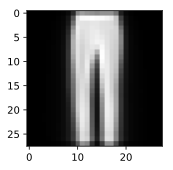

In [165]:
d2l.set_figsize()
d2l.plt.imshow(ave_1.reshape(28,28).tolist(), cmap='gray')
d2l.plt.show()

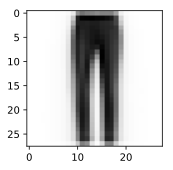

In [166]:
d2l.set_figsize()
d2l.plt.imshow(ave_1.reshape(28,28).tolist(), cmap='Greys')
d2l.plt.show()

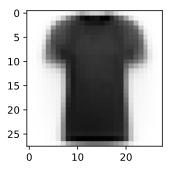

In [167]:
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28,28).tolist(),cmap='Greys')
d2l.plt.show()

In [168]:
ave_0.shape

(28, 28, 1)

In [169]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T
w.shape

(1, 28, 28)

In [170]:
print(1*28*28)
a=w.flatten()
a.shape

784


(784,)

In [171]:
X_test.shape

(2000, 28, 28, 1)

In [172]:
b=X_test.reshape(2000,-1)
b.shape

(2000, 784)

In [173]:
predictions = X_test.reshape(2000, -1).dot(w.flatten()) > -1500000
# Accuracy
np.mean(predictions.astype(y_test.dtype) == y_test, dtype=np.float64)

array(0.801, dtype=float64)

# Determinant

In [177]:
mat1=np.array([[1,3,4],[4,2,8],[9,23,25]])
mat1


array([[ 1,  3,  4],
       [ 4,  2,  8],
       [ 9, 23, 25]])

In [178]:
import numpy as np

In [179]:
np.linalg.det(mat1)

77.99999999999993

In [180]:
np.linalg.det(np.array([[1, -1], [2, 3]]))

5.000000000000001

# TENSORS

Common Examples from Linear Algebra
Letʼs see how many of the linear algebraic definitions we have seen before can be expressed in
this compressed tensor notation:
$$ v · w = \sum_{i} v_{i}w_{i}$$
 $$ \parallel v\parallel_{2}^{2} = \sum_{i} v_{i}v_{i}$$
$$ (Av)_{i} = \sum_{j} a_{ij}v_{j}$$
 $$ (AB)_{ik} = \sum_{j}a_{ij}b_{jk}$$
$$tr(A) = \sum_{i} a_{ii}$$
In this way, we can replace a myriad of specialized notations with short tensor expressions.

In [181]:
# Define tensors
B = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = np.array([[1, 2], [3, 4]])
v = np.array([1, 2])
# Print out the shapes
A.shape, B.shape, v.shape

((2, 2), (2, 2, 3), (2,))

Einstein summation has been implemented directly via np.einsum.

Einstein summation has been implemented directly via np.einsum. The indices that occurs in the
Einstein summation can be passed as a string, followed by the tensors that are being acted upon.
For instance, to implement matrix multiplication, we can consider the Einstein summation seen
above $(Av = a_{ij}v_{j})$ and strip out the indices themselves to get the implementation:


In [182]:
# Reimplement matrix multiplication
np.einsum("ij, j -> i", A, v), A.dot(v)

(array([ 5, 11]), array([ 5, 11]))

This is a highly flexible notation. For instance if we want to compute what would be traditionally
written as
$$c_{kl} = \sum_{ij}B_{ijk}A_{il}v_{j}$$
it can be implemented via Einstein summation as:

In [183]:
np.einsum("ijk, il, j -> kl", B, A, v)

array([[ 90, 126],
       [102, 144],
       [114, 162]])

This notation is readable and efficient for humans, however bulky if for whatever reason we need
to generate a tensor contraction programmatically. For this reason, einsum provides an alternative
notation by providing integer indices for each tensor. For example, the same tensor contraction
can also be written as:


In [184]:
np.einsum(B, [0, 1, 2], A, [0, 3], v, [1], [2, 3])

array([[ 90, 126],
       [102, 144],
       [114, 162]])

In [185]:
# quadratic equation

def quadratic(a,b,c):
    ans_a=(-b + np.sqrt(b**2 - 4*a*c))/2*a
    ans_b=(-b - np.sqrt(b**2 - 4*a*c))/2*a
    return ans_b,ans_a

$$ \lambda^{2} -5 \lambda + 4$$

In [186]:
quadratic(1,-5,4)

(1.0, 4.0)

$$ \lambda^{2} -4 \lambda -5$$

In [187]:
quadratic(1,-4,-5)

(-1.0, 5.0)

In [188]:
import numpy as np
np.random.seed(8675309)
k = 5
A = np.random.randn(k, k)
A

array([[ 0.58902366,  0.73311856, -1.1621888 , -0.55681601, -0.77248843],
       [-0.16822143, -0.41650391, -1.37843129,  0.74925588,  0.17888446],
       [ 0.69401121, -1.9780535 , -0.83381434,  0.56437344,  0.31201299],
       [-0.87334496,  0.15601291, -0.38710108, -0.23920821,  0.88850104],
       [ 1.29385371, -0.76774106,  0.20131613,  0.91800842,  0.38974115]])

# Letʼs see what happens when we repeatedly multiply our matrix A against a random input vector, and keep track of the norm.

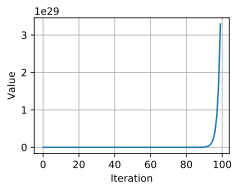

In [189]:
# Calculate the sequence of norms after repeatedly applying A
v_in = np.random.randn(k, 1)
norm_list =[np.linalg.norm(v_in)]
for i in range(1,100):
    v_in=A.dot(v_in)
    norm_list.append(np.linalg.norm(v_in))
d2l.plot(np.arange(0, 100), norm_list, 'Iteration', 'Value')

The norm is growing uncontrollably! Indeed if we take the list of quotients, we will see a pattern

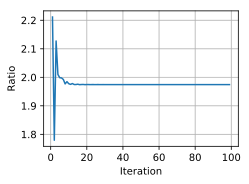

In [190]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i - 1])
d2l.plot(np.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')